In [ ]:
# 📈 Stock Regression Predictor

**Author:** Deep Joshi

**Created On:** May 21, 2025

**Project Type:** Machine Learning / Data Science / PyTorch

**Environment:** Jupyter Notebook (Python 3.13)

---

## 📝 Project Description



---

## 🔧 Technologies Used

- Python 3.x
- NumPy, Pandas
- Matplotlib
- PyTorch
- Jupyter Notebook

---

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
# Download training data from MNIST datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders to iterate over data
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

print("Training data size:", len(train_dataloader) * batch_size)
print("Test data size:", len(test_dataloader) * batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Training data size: 60032
Test data size: 10048
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
# Get device for training.
device = torch.device(
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() # Apple Silicon GPU
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, image_tensor):
        image_tensor = self.flatten(image_tensor)
        logits = self.linear_relu_stack(image_tensor)
        return logits

input_size = 28*28
hidden_size = 512
num_classes = 10

model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
# Define our learning rate, loss function and optimizer
learning_rate = 1e-3 # 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Let's define our training function 
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    for batch_num, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass to compute prediction
        pred = model(X)
        # Compute prediction error using loss function
        loss = loss_fn(pred, y)

        # Backward pass
        optimizer.zero_grad() # zero any previous gradient calculations
        loss.backward() # calculate gradient
        optimizer.step() # update model parameters
        
        if batch_num > 0 and batch_num % 100 == 0:
            loss, current = loss.item(), batch_num * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [6]:
# Our test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [7]:
# Let's run training
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.273877  [ 6400/60000]
loss: 0.200808  [12800/60000]
loss: 0.223440  [19200/60000]
loss: 0.123712  [25600/60000]
loss: 0.321525  [32000/60000]
loss: 0.118415  [38400/60000]
loss: 0.231936  [44800/60000]
loss: 0.234408  [51200/60000]
loss: 0.152175  [57600/60000]
Test Error: 
 Accuracy: 95.5%, Avg loss: 0.143679 

Epoch 2
-------------------------------
loss: 0.085285  [ 6400/60000]
loss: 0.105386  [12800/60000]
loss: 0.080966  [19200/60000]
loss: 0.054475  [25600/60000]
loss: 0.119879  [32000/60000]
loss: 0.051503  [38400/60000]
loss: 0.121248  [44800/60000]
loss: 0.103743  [51200/60000]
loss: 0.126083  [57600/60000]
Test Error: 
 Accuracy: 96.4%, Avg loss: 0.110388 

Epoch 3
-------------------------------
loss: 0.057731  [ 6400/60000]
loss: 0.041559  [12800/60000]
loss: 0.099485  [19200/60000]
loss: 0.063756  [25600/60000]
loss: 0.034899  [32000/60000]
loss: 0.018370  [38400/60000]
loss: 0.069467  [44800/60000]
loss: 0.096589  [51200/600

In [8]:
# Save our model parameters
# torch.save(model.state_dict(), "ml_with_pytorch_model.pth")
# print("Saved PyTorch Model State to ml_with_pytorch_model.pth")

# Load the saved model parameters into a new instance of the model
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load("ml_with_pytorch_model.pth", weights_only=True))

# Inference using the new model instance
model.eval()
i=0
# for i in range(50):
while (i <= 20):
    x, y = test_data[i][0], test_data[i][1]

    x = x.to(device)
    pred = model(x)
    predicted, actual = pred[0].argmax(0).item(), y
    if predicted == actual:
        i = i + 1
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "7", Actual: "7"
Predicted: "2", Actual: "2"
Predicted: "1", Actual: "1"
Predicted: "0", Actual: "0"
Predicted: "4", Actual: "4"
Predicted: "1", Actual: "1"
Predicted: "4", Actual: "4"
Predicted: "9", Actual: "9"
Predicted: "5", Actual: "5"
Predicted: "9", Actual: "9"
Predicted: "0", Actual: "0"
Predicted: "6", Actual: "6"
Predicted: "9", Actual: "9"
Predicted: "0", Actual: "0"
Predicted: "1", Actual: "1"
Predicted: "5", Actual: "5"
Predicted: "9", Actual: "9"
Predicted: "7", Actual: "7"
Predicted: "3", Actual: "3"
Predicted: "4", Actual: "4"
Predicted: "9", Actual: "9"


In [18]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))  # 1 channel = grayscale


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


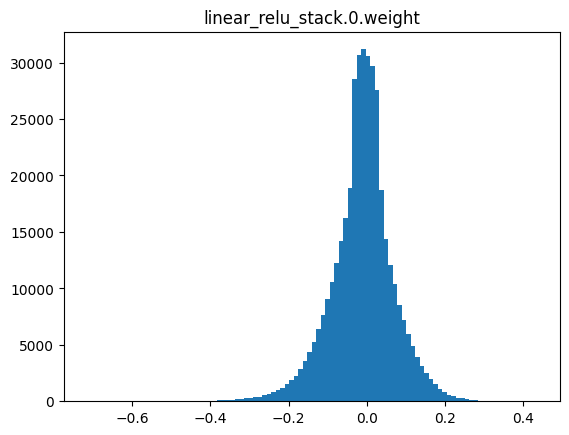

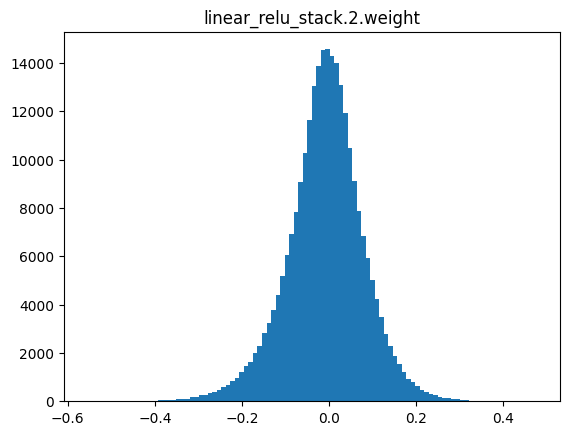

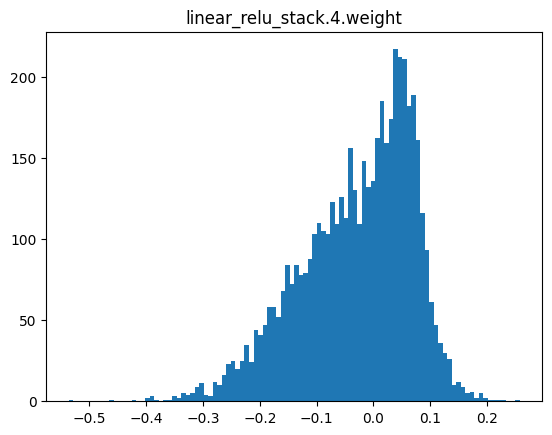

In [16]:
import matplotlib.pyplot as plt

for name, param in model.named_parameters():
    if "weight" in name:
        plt.hist(param.data.cpu().numpy().flatten(), bins=100)
        plt.title(name)
        plt.show()


In [ ]:
from    torchviz import make_dot
import torch

# Dummy input
x = torch.randn(1, 1, 28, 28).to(device)  # 1 grayscale image

# Forward pass
y = model(x)

# Visualize
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = "png"
dot.render("neural_network_visualization")
